<a href="https://colab.research.google.com/github/MarioSolano98/actividad-evaluativa3-AC/blob/main/actividad_evaluativa3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Punto 4

## Importar Librerias

In [20]:
# Clonar el repositorio
!git clone https://github.com/MarioSolano98/actividad-evaluativa3-AC.git

fatal: destination path 'actividad-evaluativa3-AC' already exists and is not an empty directory.


In [21]:
# Importar librerías esenciales
import pandas as pd            # Para manipulación y análisis de datos
import numpy as np             # Para operaciones numéricas y manejo de arrays
import matplotlib.pyplot as plt # Para visualización de gráficos
import seaborn as sns          # Para gráficos estadísticos y de exploración de datos
from sklearn.model_selection import train_test_split # Para dividir datos en entrenamiento y prueba
from sklearn.linear_model import LogisticRegression  # Modelo Logit básico
from sklearn.linear_model import RidgeClassifier, Lasso, ElasticNet # Modelos logísticos penalizados
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score # Para evaluar modelos
from sklearn.preprocessing import StandardScaler    # Para normalizar datos
from sklearn.model_selection import GridSearchCV    # Para optimizar hiperparámetros

## Análisis exploratorio

In [22]:
# Cargar el archivo de datos
data_path = '/content/actividad-evaluativa3-AC/Dengue_Data.xlsx'
data = pd.read_excel(data_path)

# Visualizar las primeras filas
data.head()

,edad_,Grupos edad,sexo_,area_,area_.1,area_.2,ocupacion_,per_etn_,gp_discapa,gp_desplaz,...,hipotermia,caida_plaq,acum_liqui,aum_hemato,extravasac,hemorr_hem,choque,daño_organ,nom_eve,Region
0,4,Primera infancia,M,Rural Disperso,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,URABA
1,27,Adultez,M,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,VALLE DE ABURRA
2,46,Adultez,F,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Trabajadores de los servicios y vendedores de ...,Otro,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,VALLE DE ABURRA
3,35,Adultez,M,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,No,No,No,No,NaN,NaN,No,NaN,DENGUE,VALLE DE ABURRA
4,11,Infancia,M,Rural Disperso,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,URABA


In [23]:
# Información general del DataFrame
print("Información general del dataset:")
data.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50397 entries, 0 to 50396
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   edad_                          50397 non-null  int64         
 1   Grupos edad                    50397 non-null  object        
 2   sexo_                          50397 non-null  object        
 3   area_                          50397 non-null  object        
 4   area_.1                        50397 non-null  object        
 5   area_.2                        50397 non-null  object        
 6   ocupacion_                     50397 non-null  object        
 7   per_etn_                       50397 non-null  object        
 8   gp_discapa                     49661 non-null  object        
 9   gp_desplaz                     49676 non-null  object        
 10  gp_migrant                     49696 non-null  ob

In [24]:
# Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas:")
data.describe()



Estadísticas descriptivas:


,edad_,fec_con_,ini_sin_,tpo_consulta(consulta-inicio),fec_hos_,tpo_deterioro(hosp-consul)
count,50397.000000,50386,50384,50384.000000,14960,14959.000000
mean,29.609858,2017-01-25 06:06:35.252649728,2017-01-20 20:32:11.470307840,4.410349,2017-03-31 07:13:03.529411584,5.136841
min,1.000000,2015-01-04 00:00:00,2014-12-30 00:00:00,0.000000,2015-01-04 00:00:00,0.000000
25%,14.000000,2016-04-05 00:00:00,2016-04-01 00:00:00,2.000000,2016-03-23 00:00:00,3.000000
50%,26.000000,2016-08-01 00:00:00,2016-07-27 00:00:00,4.000000,2016-08-09 00:00:00,4.000000
75%,42.000000,2017-07-19 00:00:00,2017-07-15 00:00:00,5.000000,2018-08-06 00:00:00,6.000000
max,131.000000,2021-02-09 00:00:00,2021-01-02 00:00:00,374.000000,2021-01-11 00:00:00,373.000000
std,19.029978,NaN,NaN,9.448480,NaN,11.527729


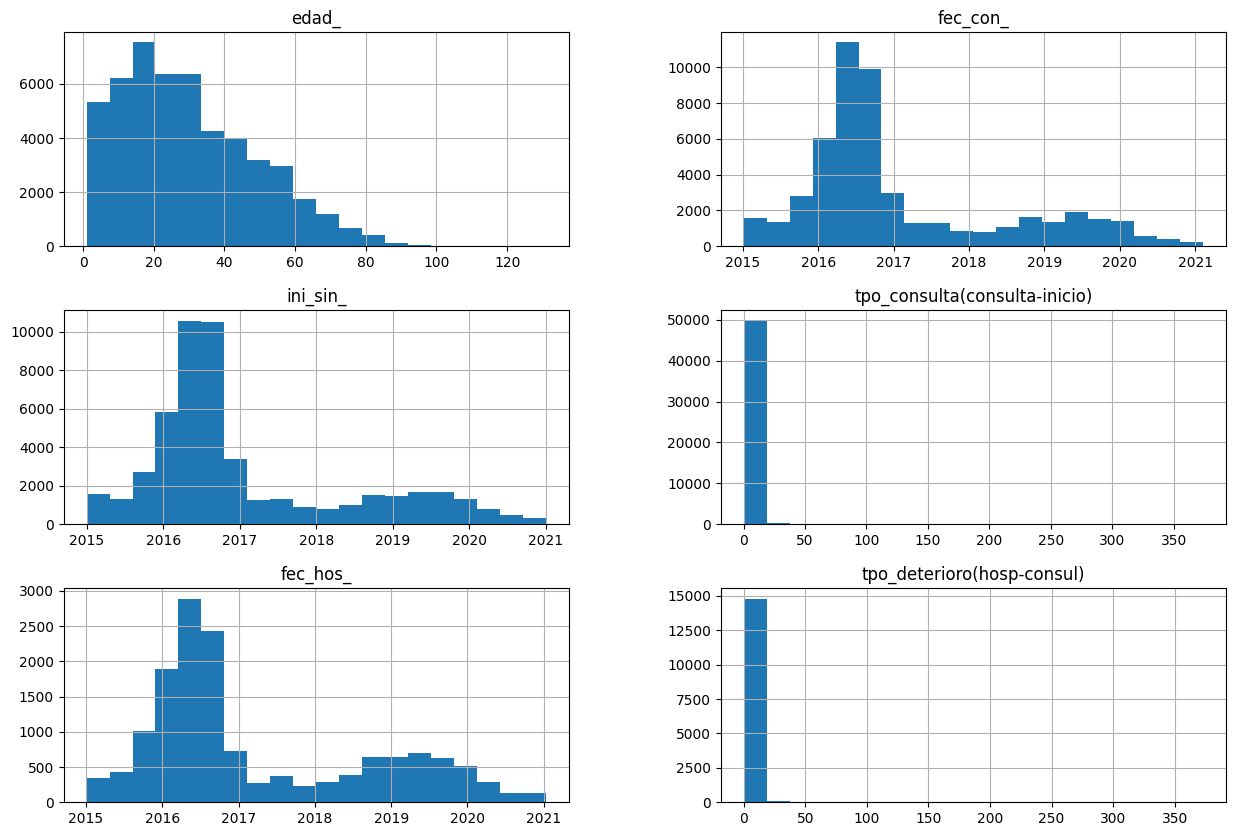

In [25]:
# Visualización de histogramas para variables numéricas
data.hist(bins=20, figsize=(15, 10))
plt.show()

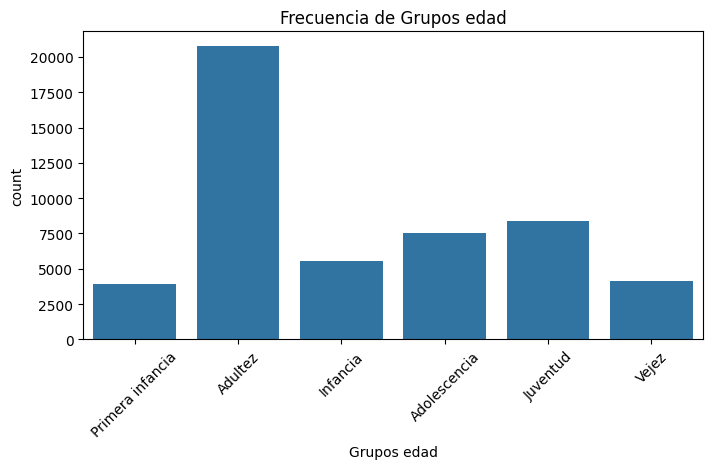

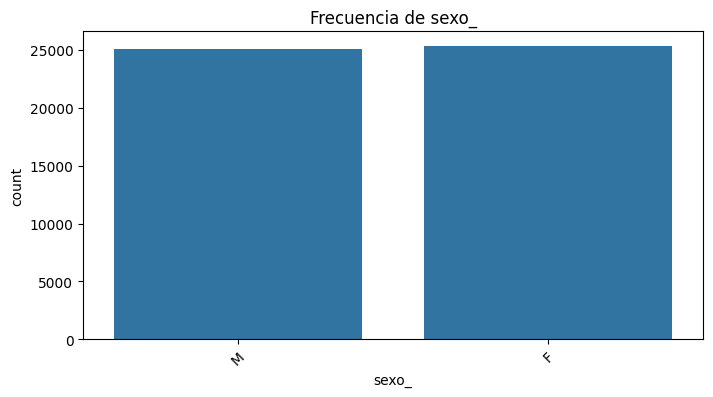

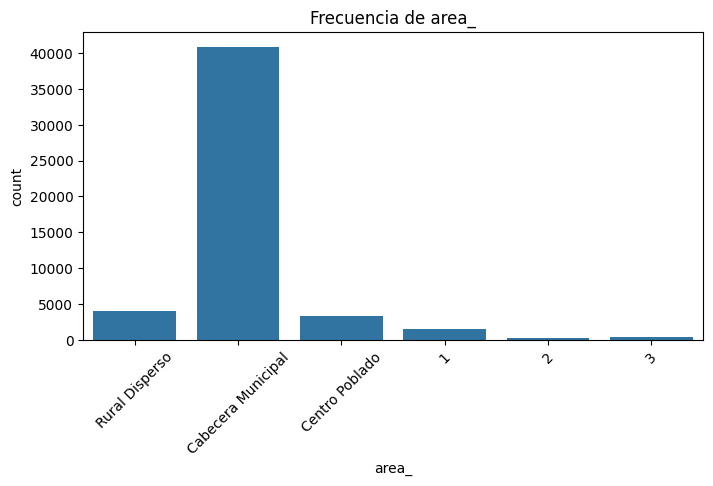

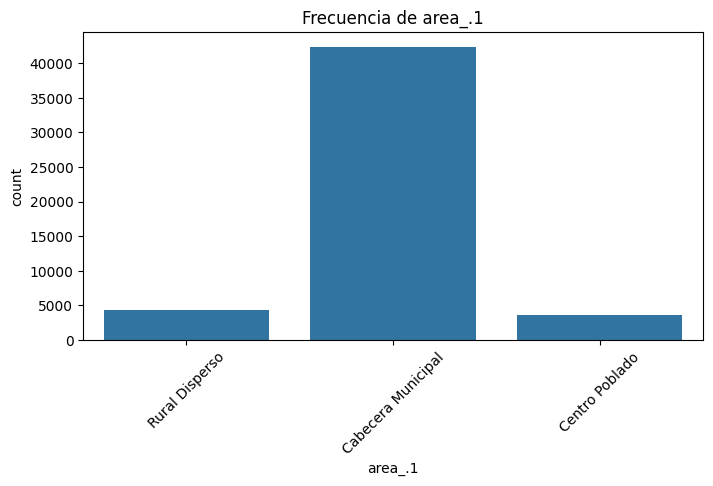

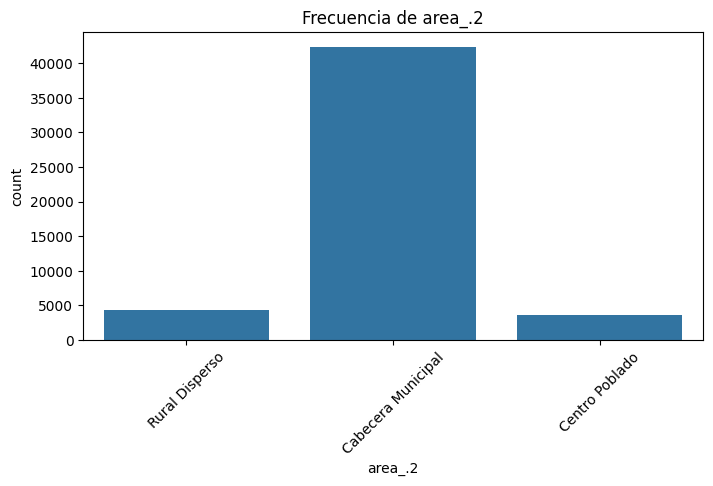

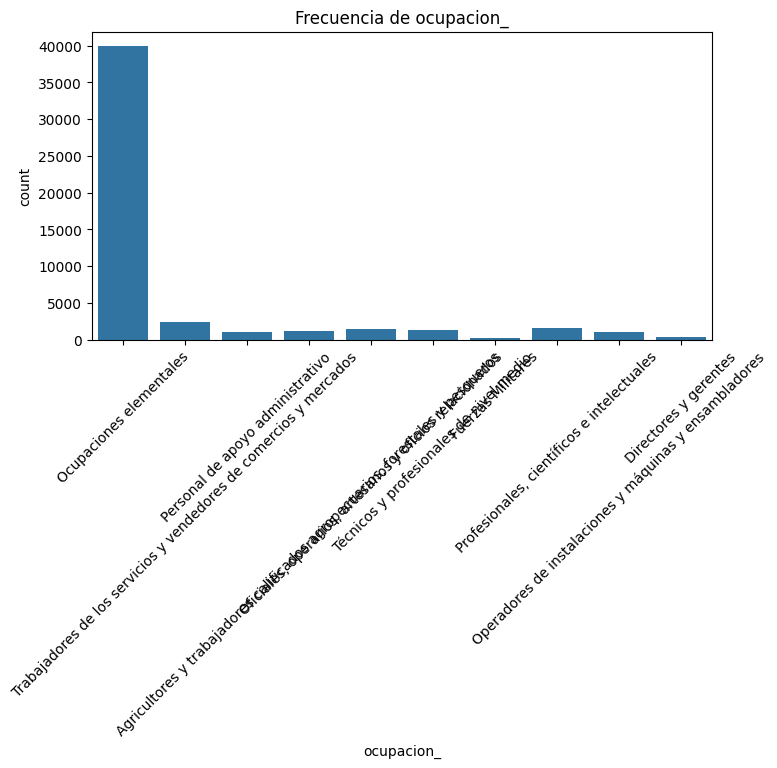

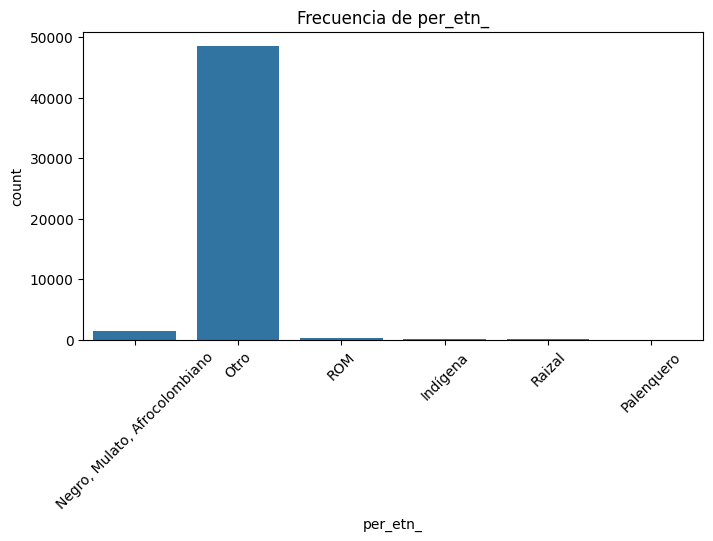

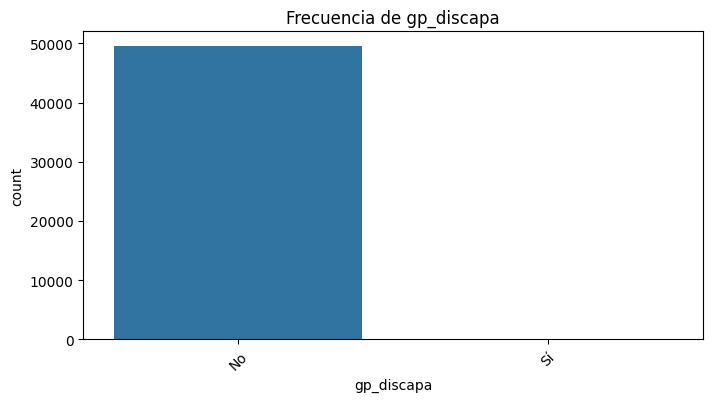

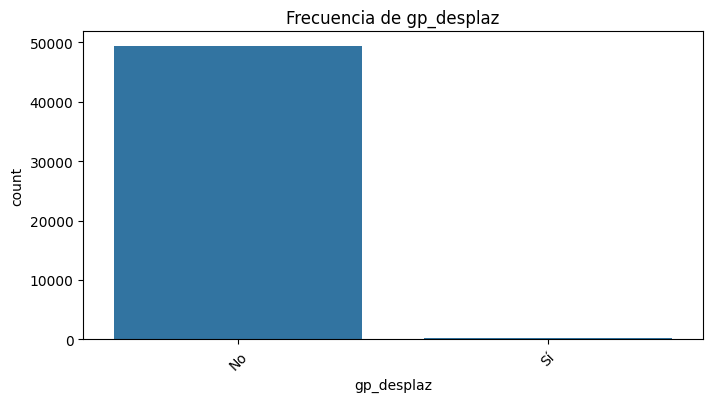

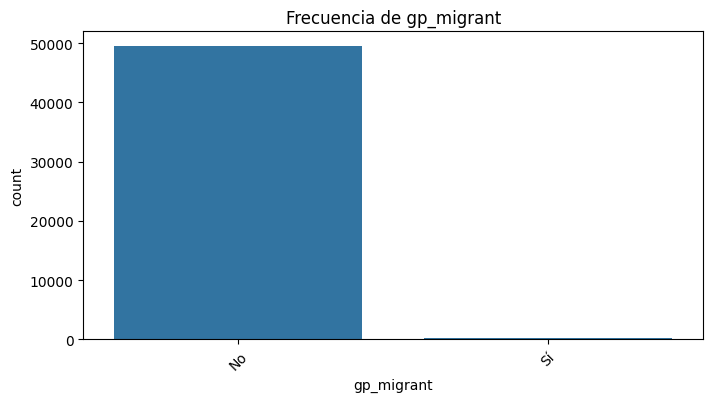

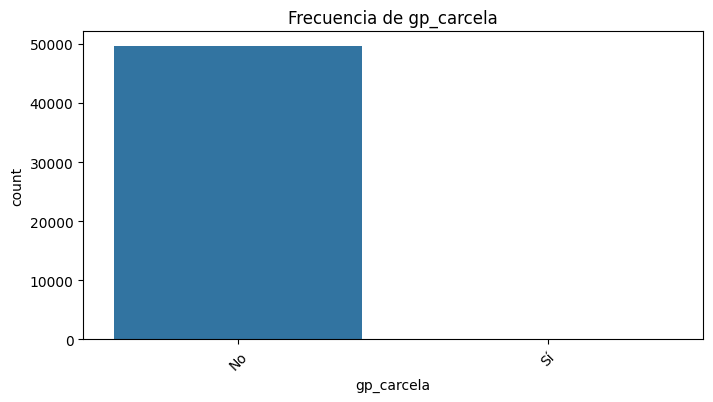

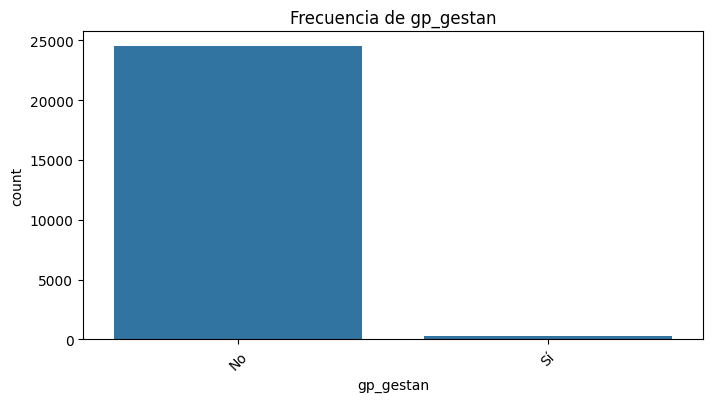

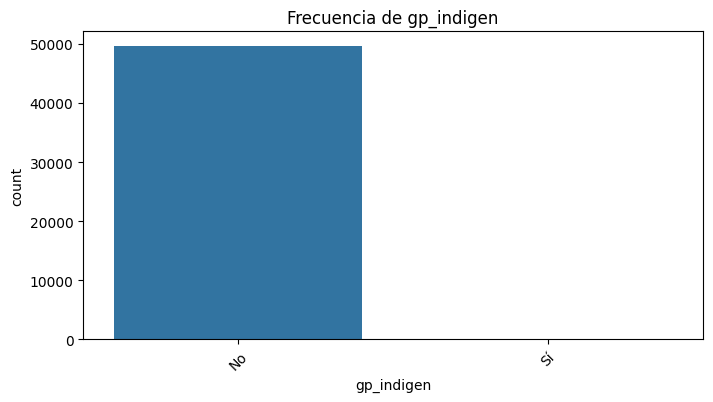

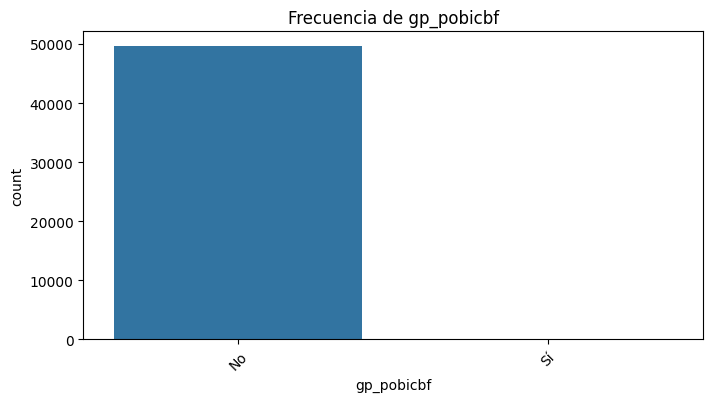

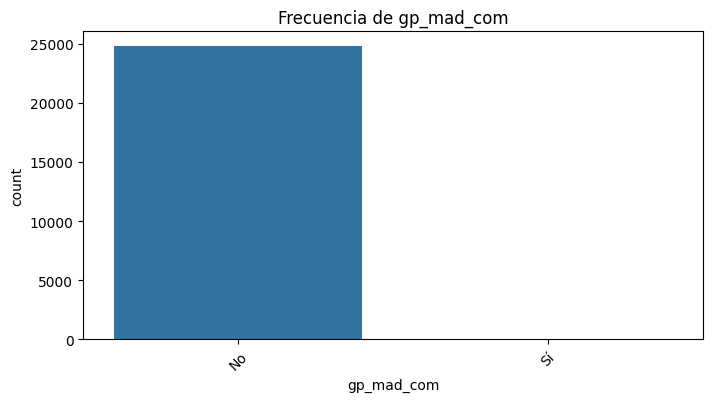

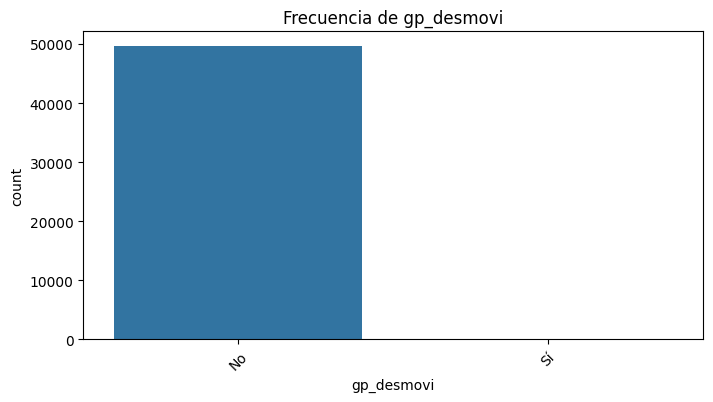

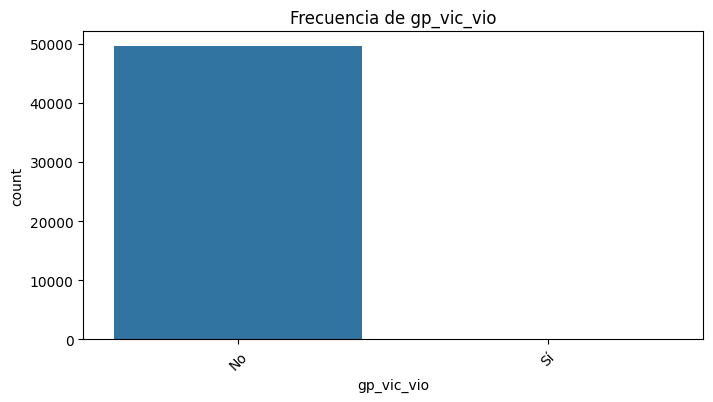

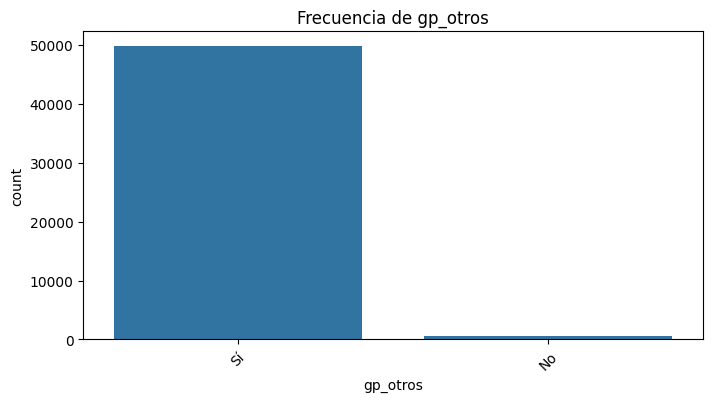

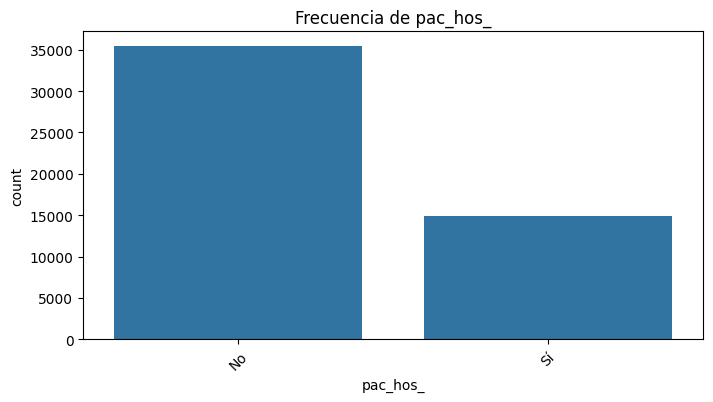

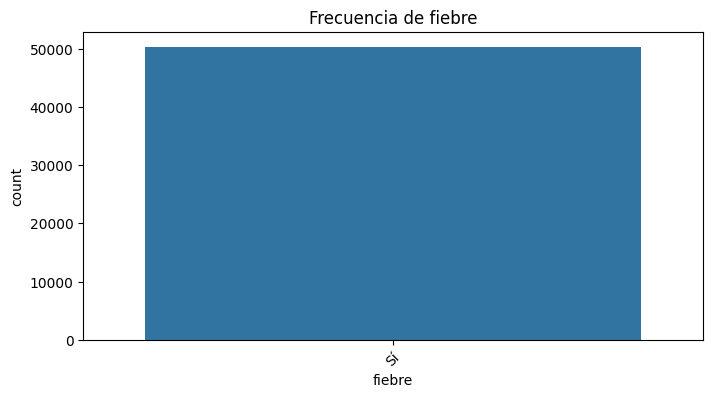

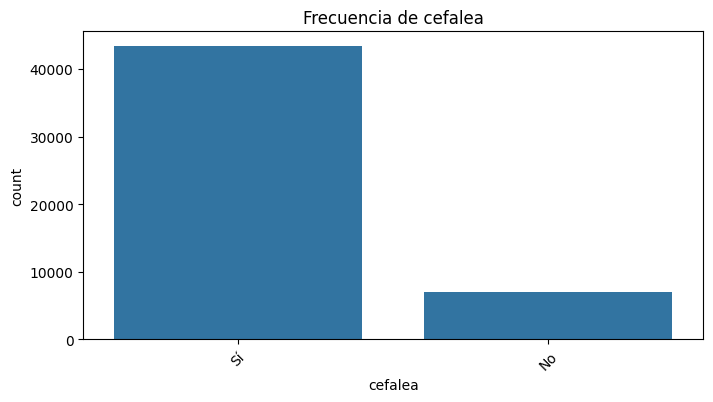

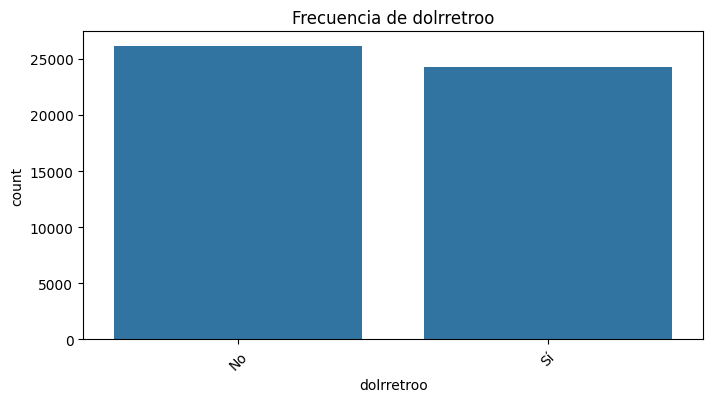

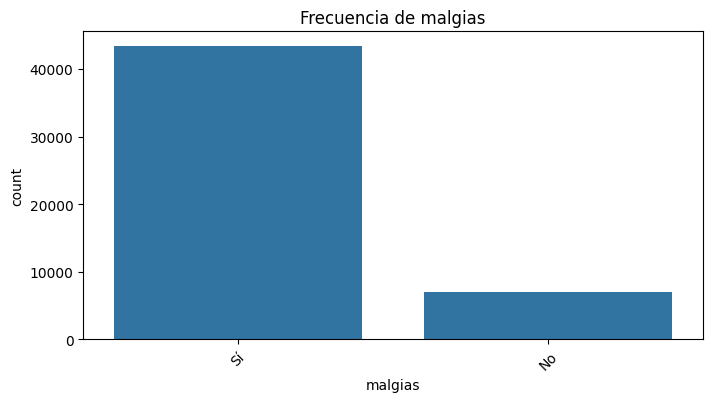

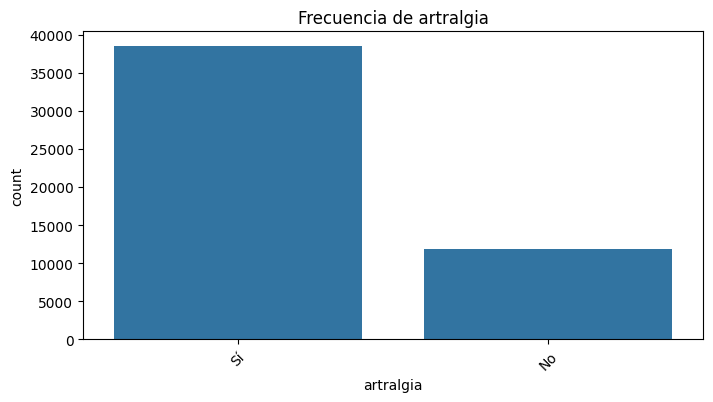

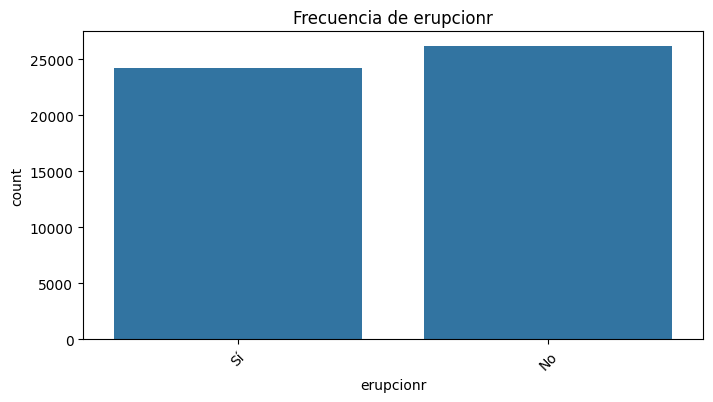

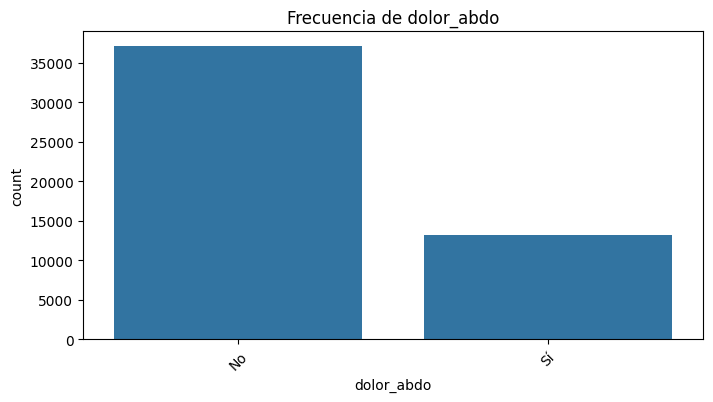

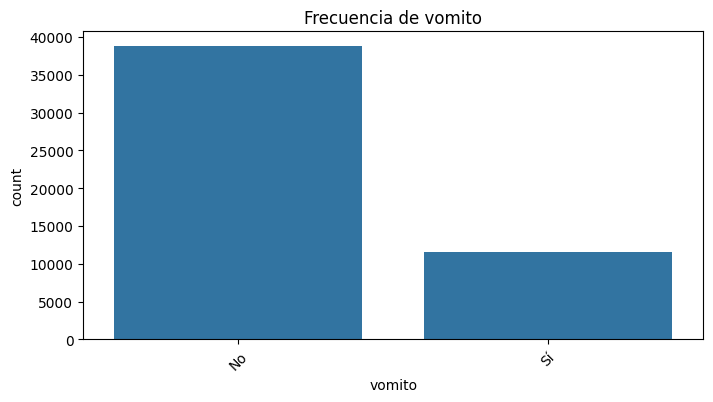

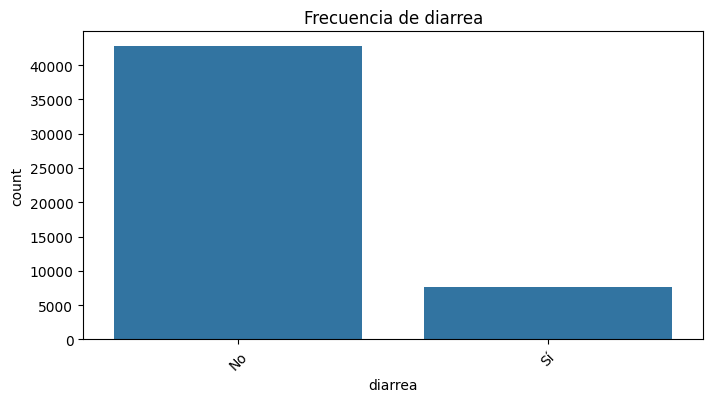

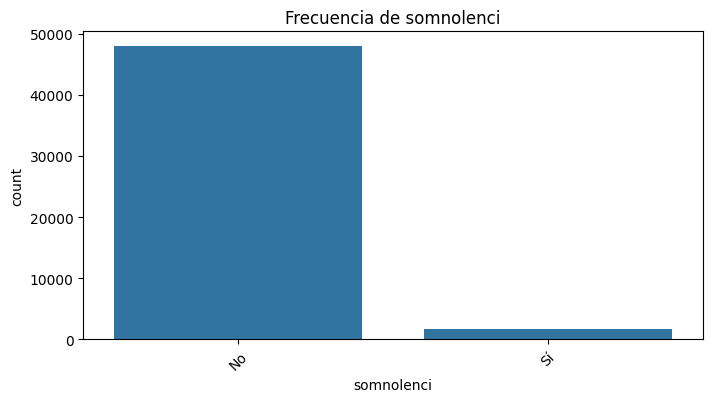

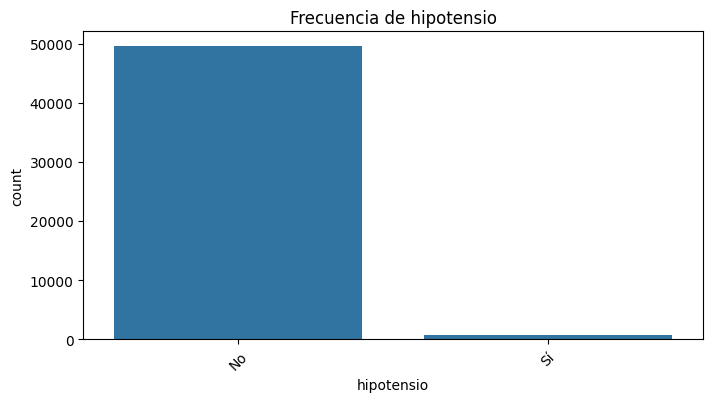

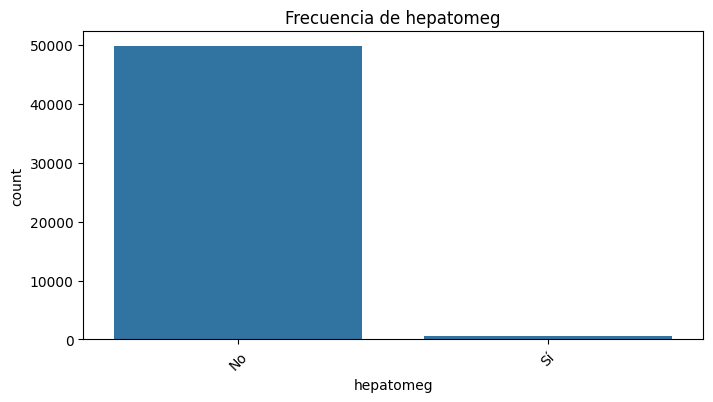

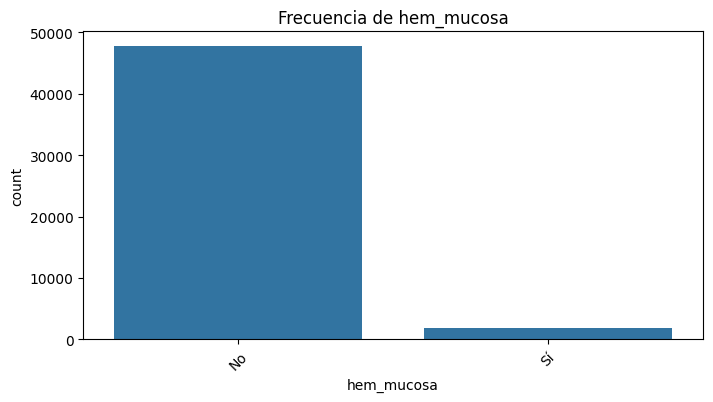

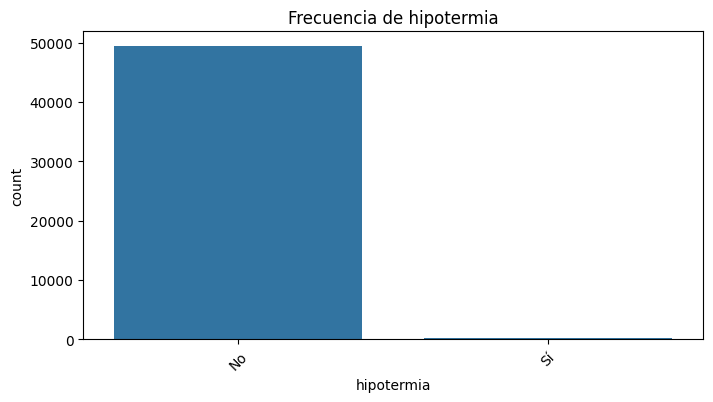

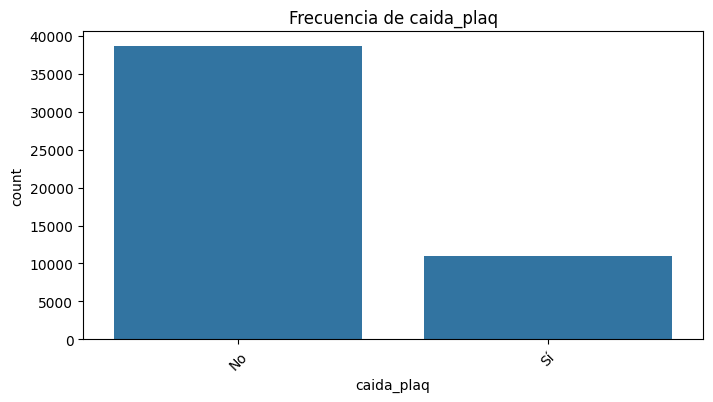

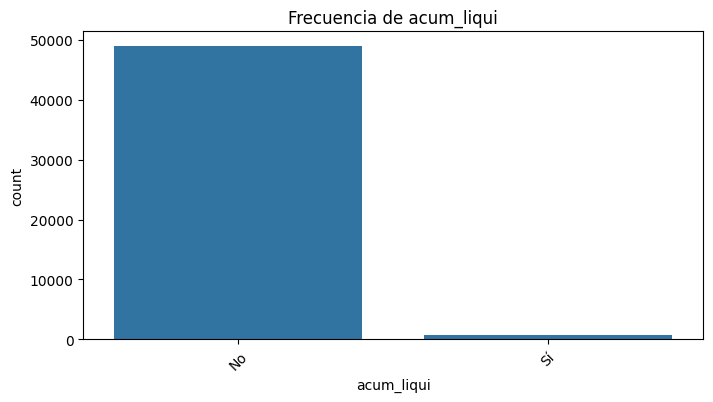

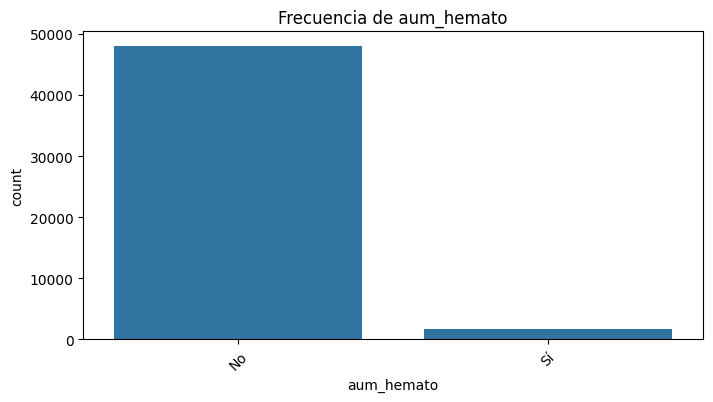

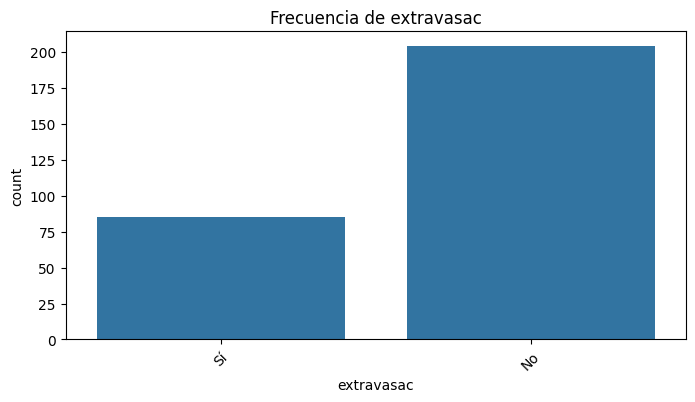

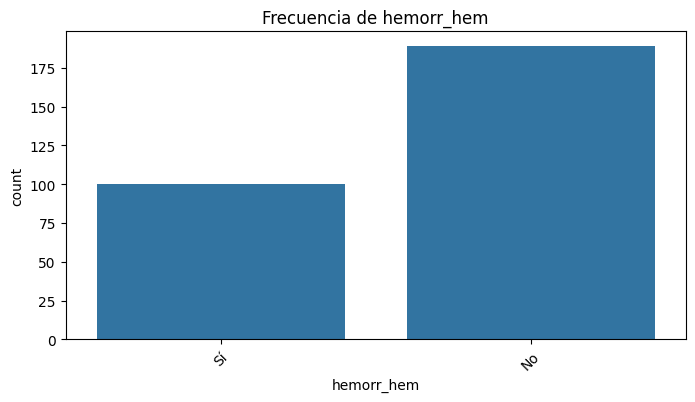

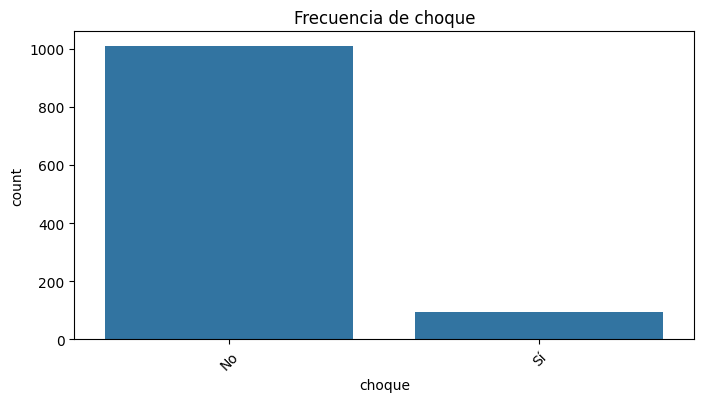

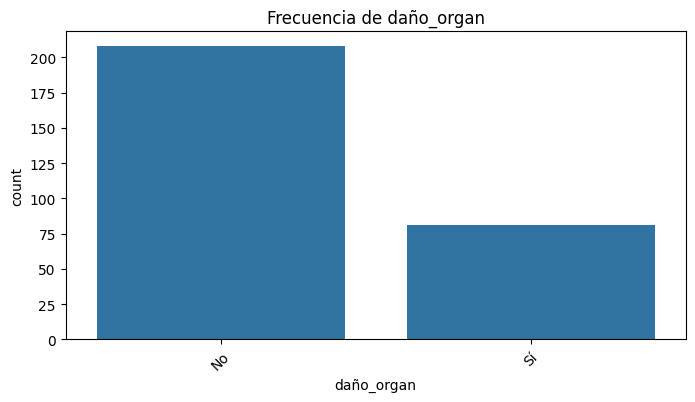

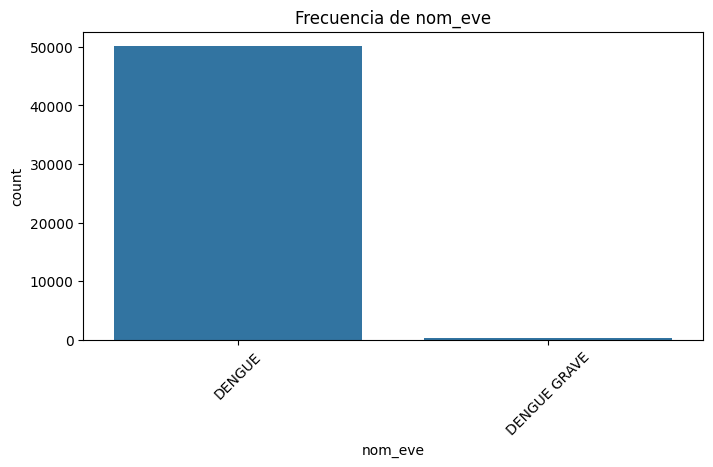

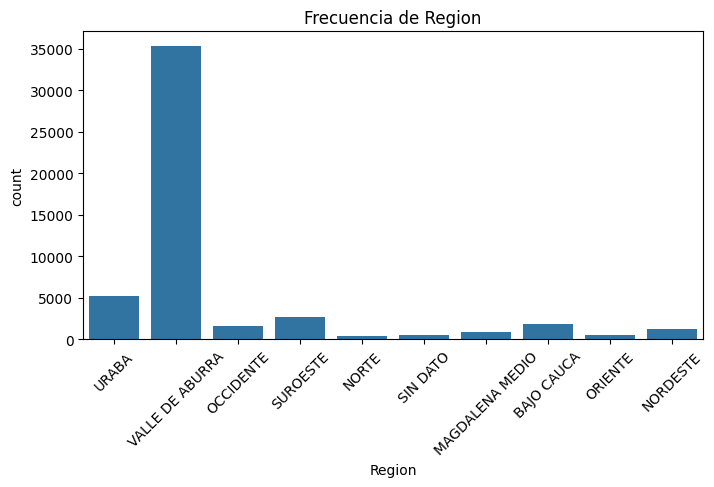

In [26]:
# Gráfico de barras para variables categóricas
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Frecuencia de {col}')
    plt.show()

<ipython-input-32-8908d173448d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")


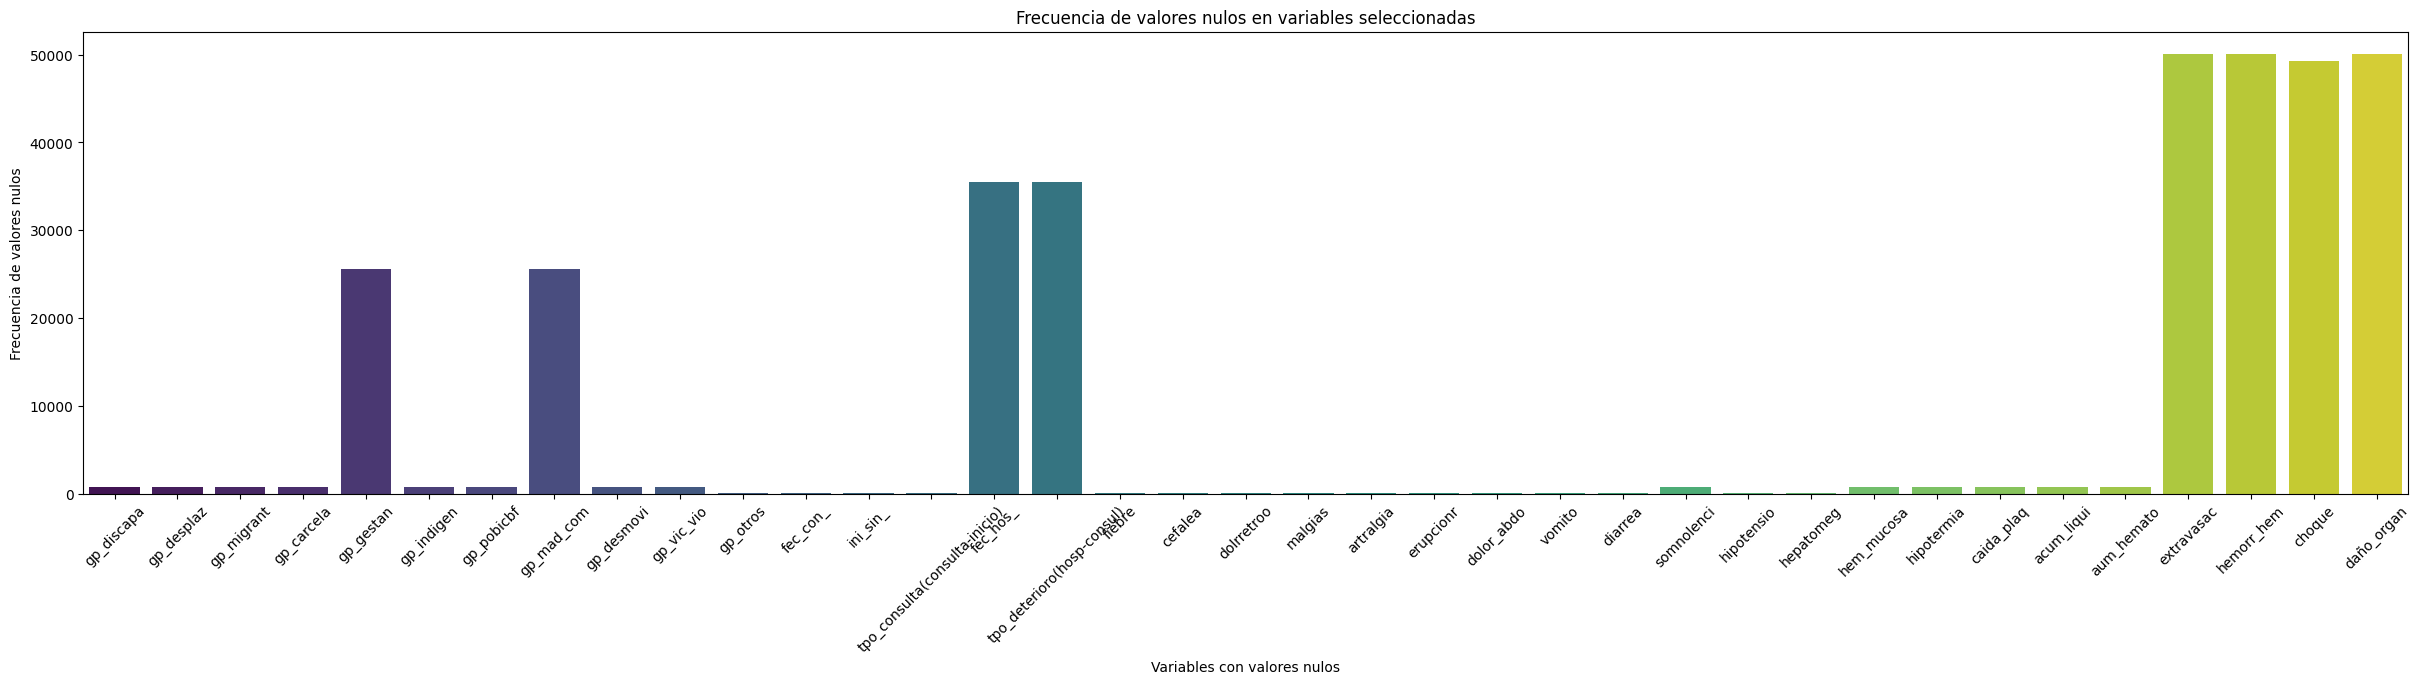

In [32]:
# Contar los valores nulos en cada columna
null_counts = data.isnull().sum()
null_counts = null_counts[null_counts > 0]  # Filtrar solo las columnas con valores nulos

# Crear el gráfico de barras solo para columnas con valores nulos
plt.figure(figsize=(30, 6))
sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Variables con valores nulos")
plt.ylabel("Frecuencia de valores nulos")
plt.title("Frecuencia de valores nulos en variables seleccionadas")
plt.show()